<a href="https://colab.research.google.com/github/NihilisticMotif/CheCheConjecture/blob/main/ML_Stats/NeuralNetwork_Ch01_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Table of Content

**1st Chapter: NN_Ch1_Regression.ipynb**

The first chapter (this chapter) demonstrates how neural network work in general and the implementation of regression neural network in Rust with the generated data.

**Introduction of Neural Network No.1**

1. Introduction
1. Forward Propagation
2. Activation Function in Hidden Layer
* RELU, LeakyRELU and Tanh
4. Activation Function in Output Layer
* Identity, Sigmoid and Softmax
5. Weight Initialization for different Activation Function
6. Loss Function for Regression Model
* Means Square Error
7. Gradient Descent, Epoch and Batch
8. Backward Propagation for Regression Model
* Compute $\frac{\partial J}{\partial W^{(i)}}$ and $\frac{\partial J}{\partial B^{(i)}}$
9. Evaluating Regression Model
* MSE, MAE, RMSE

#Get Data No.1 $y=2x^2-3x-4$

##Import Library

In [ ]:
import math
import numpy as np
#from mpl_toolkits import mplot3ttd
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp
from scipy import integrate
import time

##Generate Data

In [ ]:
def Function_Z(x1):
  Value_Z=[]
  e=np.exp(1)
  for i in range(x1.shape[0]):
      Random_1=np.random.normal(0,1, 1)[0]
      Function_X = 2*x1[i]**2-3*x1[i]-4+Random_1#20*(math.sin((x1[i]**2)/(2))+np.exp(x1[i])/100-Random_1/100)
      Value_Z.append(Function_X)
  Value_Z=np.array(Value_Z).reshape(x1.shape[0],-1)
  return Value_Z


x_values = np.linspace(-7,7, 1000)
y_values = Function_Z(x_values)

# other related information: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

In [ ]:
dataX=x_values.reshape(-1).tolist()
dataY=y_values.reshape(-1).tolist()

data = {
  "X":dataX,
  "Y": dataY,
}

df = pd.DataFrame(data)

df.head()

X           Y
0 -7.000000  113.079928
1 -6.985986  116.192824
2 -6.971972  116.351374
3 -6.957958  113.684882
4 -6.943944  113.522061

##Visualize Data

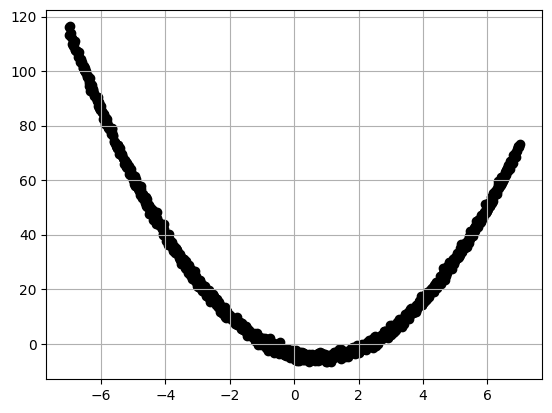

In [ ]:
plt.scatter(df['X'],df['Y'],color='#000000')
plt.grid()
plt.show()

##Distribution of the Data

In [ ]:
'''from scipy.stats import norm

#plt.hist(df['X'], color = '#333333', edgecolor = 'black',bins = 40)
# df['X'] = Uniform Distribution \in [-6,6]

plt.hist(df['Y'], color = '#3333AA', edgecolor = 'black',bins = 40,density=True)

plt.title('Probability Distribution of output data')

ynormal=np.arange(df['Y'].min(), df['Y'].max(), 0.01)
plt.plot(ynormal, norm.pdf(ynormal, df['Y'].mean(), df['Y'].std()))'''

# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

"from scipy.stats import norm\n\n#plt.hist(df['X'], color = '#333333', edgecolor = 'black',bins = 40)\n# df['X'] = Uniform Distribution \\in [-6,6]\n\nplt.hist(df['Y'], color = '#3333AA', edgecolor = 'black',bins = 40,density=True)\n\nplt.title('Probability Distribution of output data')\n\nynormal=np.arange(df['Y'].min(), df['Y'].max(), 0.01)\nplt.plot(ynormal, norm.pdf(ynormal, df['Y'].mean(), df['Y'].std()))"

**Note**

* `df['X']` and `df['Y']` following uniform distribution.

##Scale Data

(array([25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
        25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
        25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
        25.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <BarContainer object of 40 artists>)

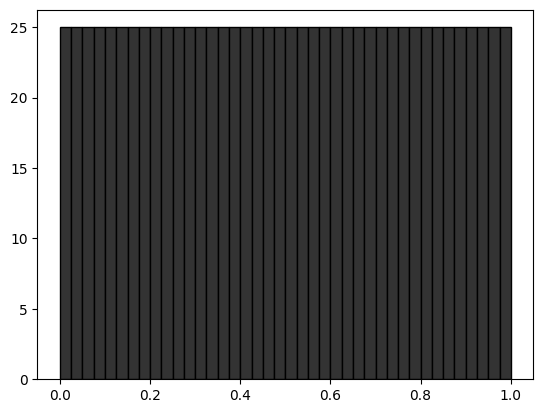

In [ ]:
df['X']=df['X'].add(-1*df['X'].min())/(df['X'].max()-df['X'].min())
# https://developers.google.com/machine-learning/data-prep/transform/normalization
plt.hist(df['X'], color = '#333333', edgecolor = 'black',bins = 40)

(array([106., 103.,  68.,  53.,  41.,  41.,  38.,  35.,  31.,  31.,  23.,
         27.,  27.,  27.,  21.,  20.,  25.,  24.,  22.,  17.,  18.,  20.,
         20.,  21.,  19.,  17.,   5.,  12.,   8.,   7.,   7.,   9.,   9.,
          6.,   7.,   8.,   7.,  11.,   4.,   5.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <BarContainer object of 40 artists>)

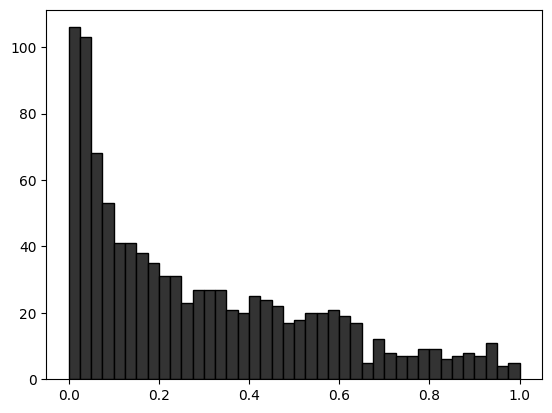

In [ ]:
df['Y']=df['Y'].add(-1*df['Y'].min())/(df['Y'].max()-df['Y'].min())
plt.hist(df['Y'], color = '#333333', edgecolor = 'black',bins = 40)

**Note:**

Scaling data is used for making the neural network train the data more easily because when the data is scaled, the range of data is between $0$ and $1$.

The formula is
* $X=\frac{X-X_{min}}{X_{max}-X_{min}}\in\mathbb{R^m}$
* $X_{max},X_{min}\in\mathbb{R}$

##Train-Test Split



In [ ]:
def SeparateData(data,Ratio,nameY):

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)
  TrainD= Data.iloc[:DataRatio]
  TesttD= Data.iloc[DataRatio:]

  TrainX=TrainD.drop(nameY, axis=1)
  TrainY=TrainD[nameY]
  TesttX=TesttD.drop(nameY, axis=1)
  TesttY=TesttD[nameY]

  return [TrainX,TrainY,TesttX,TesttY]

DT=SeparateData(df,0.75,'Y')
TrX01=DT[0]
TrY01=DT[1]
TeX01=DT[2]
TeY01=DT[3]


#Get Data No.2 $y=e^x-x^3$

##Generate Data

In [ ]:
def Function_Z(x1):
  Value_Z=[]
  e=np.exp(1)
  for i in range(x1.shape[0]):
      Random_1=np.random.normal(1,4, 1)[0]
      Function_X = np.exp(x1[i])-x1[i]**3+Random_1
      Value_Z.append(Function_X)
  Value_Z=np.array(Value_Z).reshape(x1.shape[0],-1)
  return Value_Z


x_values = np.linspace(-10,10, 1000)
y_values = Function_Z(x_values)

# other related information: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

In [ ]:
dataX=x_values.reshape(-1).tolist()
dataY=y_values.reshape(-1).tolist()

data = {
  "X":dataX,
  "Y": dataY,
}

df = pd.DataFrame(data)

df.head()

X            Y
0 -10.00000  1000.879685
1  -9.97998   998.552501
2  -9.95996   985.082767
3  -9.93994   985.474130
4  -9.91992   975.623053

##Visualize Data

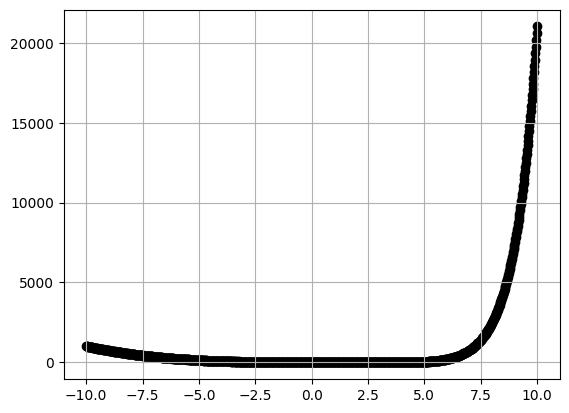

In [ ]:
plt.scatter(df['X'],df['Y'],color='#000000')
plt.grid()
plt.show()

##Distribution of the Data

In [ ]:
'''from scipy.stats import norm

#plt.hist(df['X'], color = '#333333', edgecolor = 'black',bins = 40)
# df['X'] = Uniform Distribution \in [-6,6]

plt.hist(df['Y'], color = '#3333AA', edgecolor = 'black',bins = 40,density=True)

plt.title('Probability Distribution of output data')

ynormal=np.arange(df['Y'].min(), df['Y'].max(), 0.01)
plt.plot(ynormal, norm.pdf(ynormal, df['Y'].mean(), df['Y'].std()))'''

# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

"from scipy.stats import norm\n\n#plt.hist(df['X'], color = '#333333', edgecolor = 'black',bins = 40)\n# df['X'] = Uniform Distribution \\in [-6,6]\n\nplt.hist(df['Y'], color = '#3333AA', edgecolor = 'black',bins = 40,density=True)\n\nplt.title('Probability Distribution of output data')\n\nynormal=np.arange(df['Y'].min(), df['Y'].max(), 0.01)\nplt.plot(ynormal, norm.pdf(ynormal, df['Y'].mean(), df['Y'].std()))"

**Note**

* `df['X']` and `df['Y']` following uniform distribution.

##Scale Data

(array([25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
        25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
        25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
        25.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <BarContainer object of 40 artists>)

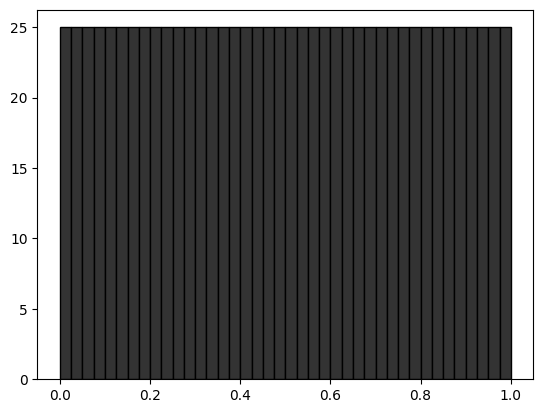

In [ ]:
df['X']=df['X'].add(-1*df['X'].min())/(df['X'].max()-df['X'].min())
# https://developers.google.com/machine-learning/data-prep/transform/normalization
plt.hist(df['X'], color = '#333333', edgecolor = 'black',bins = 40)

(array([734., 128.,  18.,  12.,  10.,   8.,   7.,   6.,   6.,   5.,   4.,
          4.,   4.,   3.,   4.,   3.,   3.,   2.,   3.,   2.,   3.,   2.,
          2.,   2.,   2.,   2.,   2.,   1.,   2.,   2.,   1.,   2.,   1.,
          2.,   1.,   1.,   2.,   1.,   1.,   2.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <BarContainer object of 40 artists>)

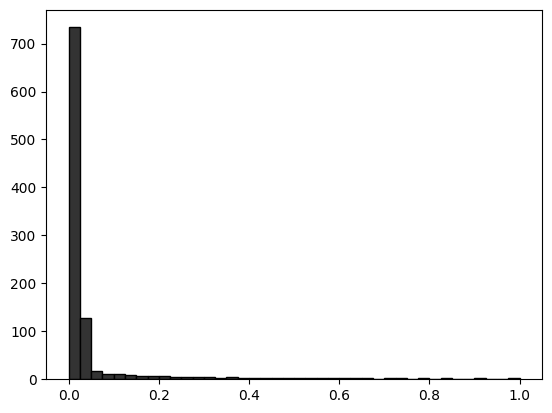

In [ ]:
df['Y']=df['Y'].add(-1*df['Y'].min())/(df['Y'].max()-df['Y'].min())
plt.hist(df['Y'], color = '#333333', edgecolor = 'black',bins = 40)

**Note:**

Scaling data is used for making the neural network train the data more easily because when the data is scaled, the range of data is between $0$ and $1$.

The formula is
* $X=\frac{X-X_{min}}{X_{max}-X_{min}}\in\mathbb{R^m}$
* $X_{max},X_{min}\in\mathbb{R}$

##Train-Test Split



In [ ]:
def SeparateData(data,Ratio,nameY):

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)
  TrainD= Data.iloc[:DataRatio]
  TesttD= Data.iloc[DataRatio:]

  TrainX=TrainD.drop(nameY, axis=1)
  TrainY=TrainD[nameY]
  TesttX=TesttD.drop(nameY, axis=1)
  TesttY=TesttD[nameY]

  return [TrainX,TrainY,TesttX,TesttY]

DT=SeparateData(df,0.75,'Y')
TrX02=DT[0]
TrY02=DT[1]
TeX02=DT[2]
TeY02=DT[3]


#Get Data No.3 $y=4\sin(x)$

##Generate Data

In [ ]:
def Function_Z(x1):
  Value_Z=[]
  e=np.exp(1)
  for i in range(x1.shape[0]):
      Random_1=np.random.normal(0,0.5, 1)[0]
      Function_X = 4*math.sin(x1[i])+Random_1
      Value_Z.append(Function_X)
  Value_Z=np.array(Value_Z).reshape(x1.shape[0],-1)
  return Value_Z


x_values = np.linspace(-6,6, 1000)
y_values = Function_Z(x_values)

# other related information: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

In [ ]:
dataX=x_values.reshape(-1).tolist()
dataY=y_values.reshape(-1).tolist()

data = {
  "X":dataX,
  "Y": dataY,
}

df = pd.DataFrame(data)

df.head()

X         Y
0 -6.000000  1.173472
1 -5.987988  0.869403
2 -5.975976  1.684122
3 -5.963964  1.387746
4 -5.951952  0.572849

##Visualize Data

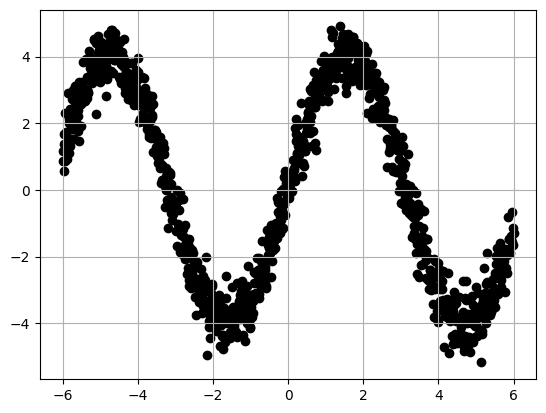

In [ ]:
plt.scatter(df['X'],df['Y'],color='#000000')
plt.grid()
plt.show()

##Distribution of the Data

In [ ]:
'''from scipy.stats import norm

#plt.hist(df['X'], color = '#333333', edgecolor = 'black',bins = 40)
# df['X'] = Uniform Distribution \in [-6,6]

plt.hist(df['Y'], color = '#3333AA', edgecolor = 'black',bins = 40,density=True)

plt.title('Probability Distribution of output data')

ynormal=np.arange(df['Y'].min(), df['Y'].max(), 0.01)
plt.plot(ynormal, norm.pdf(ynormal, df['Y'].mean(), df['Y'].std()))'''

# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

"from scipy.stats import norm\n\n#plt.hist(df['X'], color = '#333333', edgecolor = 'black',bins = 40)\n# df['X'] = Uniform Distribution \\in [-6,6]\n\nplt.hist(df['Y'], color = '#3333AA', edgecolor = 'black',bins = 40,density=True)\n\nplt.title('Probability Distribution of output data')\n\nynormal=np.arange(df['Y'].min(), df['Y'].max(), 0.01)\nplt.plot(ynormal, norm.pdf(ynormal, df['Y'].mean(), df['Y'].std()))"

**Note**

* `df['X']` and `df['Y']` following uniform distribution.

##Scale Data

(array([25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
        25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
        25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
        25.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <BarContainer object of 40 artists>)

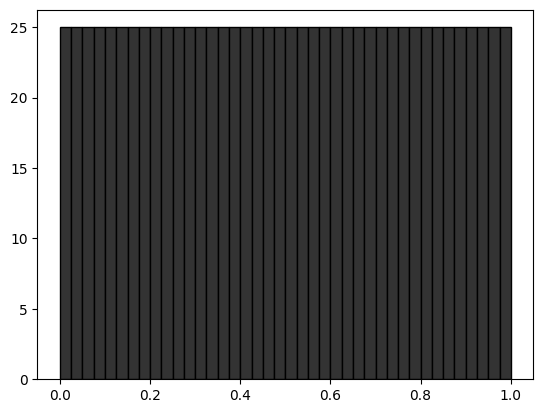

In [ ]:
df['X']=df['X'].add(-1*df['X'].min())/(df['X'].max()-df['X'].min())
# https://developers.google.com/machine-learning/data-prep/transform/normalization
plt.hist(df['X'], color = '#333333', edgecolor = 'black',bins = 40)

(array([ 2.,  7., 13., 22., 28., 44., 49., 42., 35., 36., 31., 24., 28.,
        25., 23., 16., 16., 12., 18., 19., 17., 17., 15., 16., 11., 27.,
        25., 24., 26., 23., 20., 31., 42., 46., 46., 40., 35., 21., 19.,
         9.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <BarContainer object of 40 artists>)

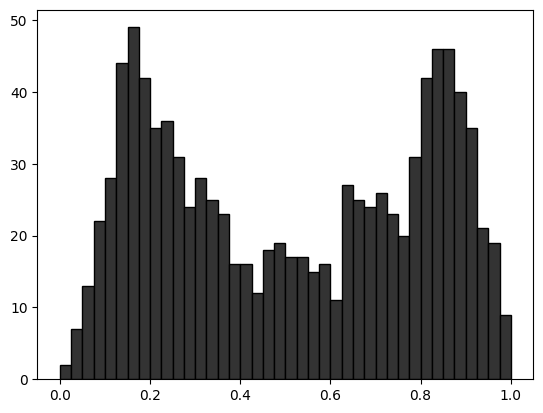

In [ ]:
df['Y']=df['Y'].add(-1*df['Y'].min())/(df['Y'].max()-df['Y'].min())
plt.hist(df['Y'], color = '#333333', edgecolor = 'black',bins = 40)

**Note:**

Scaling data is used for making the neural network train the data more easily because when the data is scaled, the range of data is between $0$ and $1$.

The formula is
* $X=\frac{X-X_{min}}{X_{max}-X_{min}}\in\mathbb{R^m}$
* $X_{max},X_{min}\in\mathbb{R}$

##Train-Test Split



In [ ]:
def SeparateData(data,Ratio,nameY):

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)
  TrainD= Data.iloc[:DataRatio]
  TesttD= Data.iloc[DataRatio:]

  TrainX=TrainD.drop(nameY, axis=1)
  TrainY=TrainD[nameY]
  TesttX=TesttD.drop(nameY, axis=1)
  TesttY=TesttD[nameY]

  return [TrainX,TrainY,TesttX,TesttY]

DT=SeparateData(df,0.75,'Y')
TrX03=DT[0]
TrY03=DT[1]
TeX03=DT[2]
TeY03=DT[3]


#Introduction of Neural Network No.1

##Introduction

**What is Neural Network?**

Neural network is the Machine learning algorithm that is similar to logistic regression and linear regression, but it have multiple hidden activated functions, which help it predicts more complicate behavior. If there are enough time, computational power and data, it can predicts everything and think everything that human brains can think of. (universal approximation theorem) Even through, neural network is useful, the main limitation are
1. It requires a lot of data, computational power and time, in order to make it becomes useful.
2. It is hard to predict the behavior of neural network. (black box)
3. It is easily prone to overfitting or under fitting.

Reference:
1. https://ai.stackexchange.com/questions/13317/where-can-i-find-the-proof-of-the-universal-approximation-theorem
* This post explain when is universal approximation theorem.

***

**Why doesn't deep learning work as well in regression as in classification?**

Neural network have hidden layers which makes it good at generalizing (classifying) data. For example, when categorizing whatever a picture is a bus or not, each input node in the first layer of neural network detect each pixels color (3 rows vectors), the first hidden layers will detect the shape of edges, the next layers will detect the combination of edges and decide whatever, the combinations is a wheel, box and the last layers will decide how many percents that the picture is lakely to be a picture of bus or not. Neural network without hidden layers cannot classify the image because the function is not complicate enough to describe the pattern of the data.

However, in my opinion, regression problems are usually about predicting and approximating the relationship between variables than classifying it. Neural network requires a lot of data and time in order to work effectively compared to other machine learning models. In addition, neural network tend to be prone to overfitting than other models because it have multiple hidden activated function.

***

Reference:
1. https://stats.stackexchange.com/questions/319349/why-doesnt-deep-learning-work-as-well-in-regression-as-in-classification
* This link contains other opinion about this question.
2. https://stats.stackexchange.com/questions/63152/what-does-the-hidden-layer-in-a-neural-network-compute
* This link explain why neural network have hidden layers.

***

##Forward Propagation

**How neural network compute output?**

The process of computing output is called Forward Propagation.

1. Input Layer
 1. Get column vector $\vec{x}_{n}$ from $X_{m\times n}$
 * This layer takes the $m$ rows input data to the next layer.
2. Hidden Layer
 1. $\vec{h}_{c\cdot0}=h(W_{c\cdot0\times n}\cdot \vec{x}_{n}+\vec{b}_{c\cdot0})=h(\vec{x}_{c\cdot0})$
 1. $\vec{h}_{c\cdot1}=h(W_{c\cdot1\times c\cdot0}\cdot \vec{h}_{c\cdot0}+\vec{b}_{c\cdot1})=h(\vec{x}_{c\cdot1})$
 1. ...
 1. $\vec{h}_{c\cdot j}=h(W_{c\cdot j\times c\cdot(j-1)}\cdot \vec{h}_{c\cdot(j-1)}+\vec{b}_{c\cdot j})=h(\vec{x}_{c\cdot j})$
 * The hidden layers help neural network predict non-linear data.
 * All hidden layered activation function is not linear, because if it is, the model cannot predict non-linear data and becomes linear regression. (https://www.geeksforgeeks.org/activation-functions-neural-networks/)
 * The activation functions in hidden layers effect how fast and how efficient the neural network learn.
 * Most model use the same activation function in every hidden layers.
 * $h\in\{$ ReLU, Leaky ReLU, Randomized Leaky ReLU, Tanh, etc. $\}$
3. Output Layer
 1. $\vec{y}'_{C}=F(W_{C\times c\cdot j}\cdot \vec{h}_{c\cdot j}+\vec{b}_{C})=F(\vec{x}_C)$
 * The output layer compute the output data.
 * $F\in\{$ Linear (regression), Sigmoid (Binary Classification), Softmax (Multiclass Classification), etc.$\}$

***

**Meaning of each variables**

1. Variable that define Data
 * $X_{m\times n}\in\mathbb{R^{m\times n}}=$ input matrix
 * $Y_{m\times C}\in\mathbb{R^{m\times n}}=$ output matrix
 * $\vec{x}_{n}\in\mathbb{R^{n}}=$ row vector of input matrix
 * $\vec{y}_C=$ row vector of output matrix
 * $m=$ number of total rows of the matrix $X_{m\times n}$
 * $n=$ number of all columns in the matrix $X_{m\times n}$
 * $C=$ class of data, in regression case $C=1$, in classification case $C\in\mathbb{Z^+}$

2. Variable that define Neural Network Model
 * $\vec{y}'_{C}\in\mathbb{R^{C}}=$ output vector of the neural network model with input $\vec{x}_{n}$
 * $W_{c\cdot i\times c\cdot(i-1)}\in\mathbb{R^{c\cdot i\times c\cdot(i-1)}}=$ Weight Matrix in layer no.$i$
 * $W_{c\cdot 0\times n}\in\mathbb{R^{c\cdot 0\times n}}=$ Weight Matrix in layer no.$0$
 * $W_{C\times c\cdot j}\in\mathbb{R^{c\cdot 0\times n}}=$ Weight Matrix in output layer
 * $\vec{b}_{c\cdot i}\in\mathbb{R^{c\cdot i}}=$ Bias Vector in layer no.$i$
 * $\vec{b}_{c\cdot 0}\in\mathbb{R^{c\cdot 0}}=$ Bias Vector in layer no.$0$
 * $\vec{b}_{C}\in\mathbb{R^{C}}=$ Bias Vector in output layer
 * $c\cdot i\in\mathbb{Z^+}=$ number of nodes in the layer no.$i$
 * $c\cdot j=$ number of nodes in the last hidden layer
 * $C=$ number of nodes in the output layer
 * $j+1=$ number of all hidden layers in the model

3. Activation Functions and their output inside Neural Network
 * $h(...)=$ hidden layered activation functions
 * $\vec{h}_{c\cdot i}\in\mathbb{R^{c\cdot i}}=$ output vector of the hidden layered activation function in layer no.$i$
 * $F(...)=$ output layered activation functions
 * Both $F(...)$ and $h(...)$ must have first order derivative, so that it can be optimized by gradient descents.
 * $\vec{x}_{c\cdot i}\in\mathbb{R^{c\cdot i}}=$ input vector of activation function in hidden layered no.$i$
 * $\vec{x}_C\in\mathbb{R^C}=$ input vector of the output activation function

4. Note
 * Neural network can have any number of node in each layer ($c\cdot i\lor C$). Each node consists of each activation function
 * Neural network can have any number of hidden layers. ($j+1$)
  * If the neural network have 0 hidden layer ($j=0$),then the model is linear or logistic regression.

***

Reference:
1. https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
* This link explains how to choose the right activation in neural networks.

***

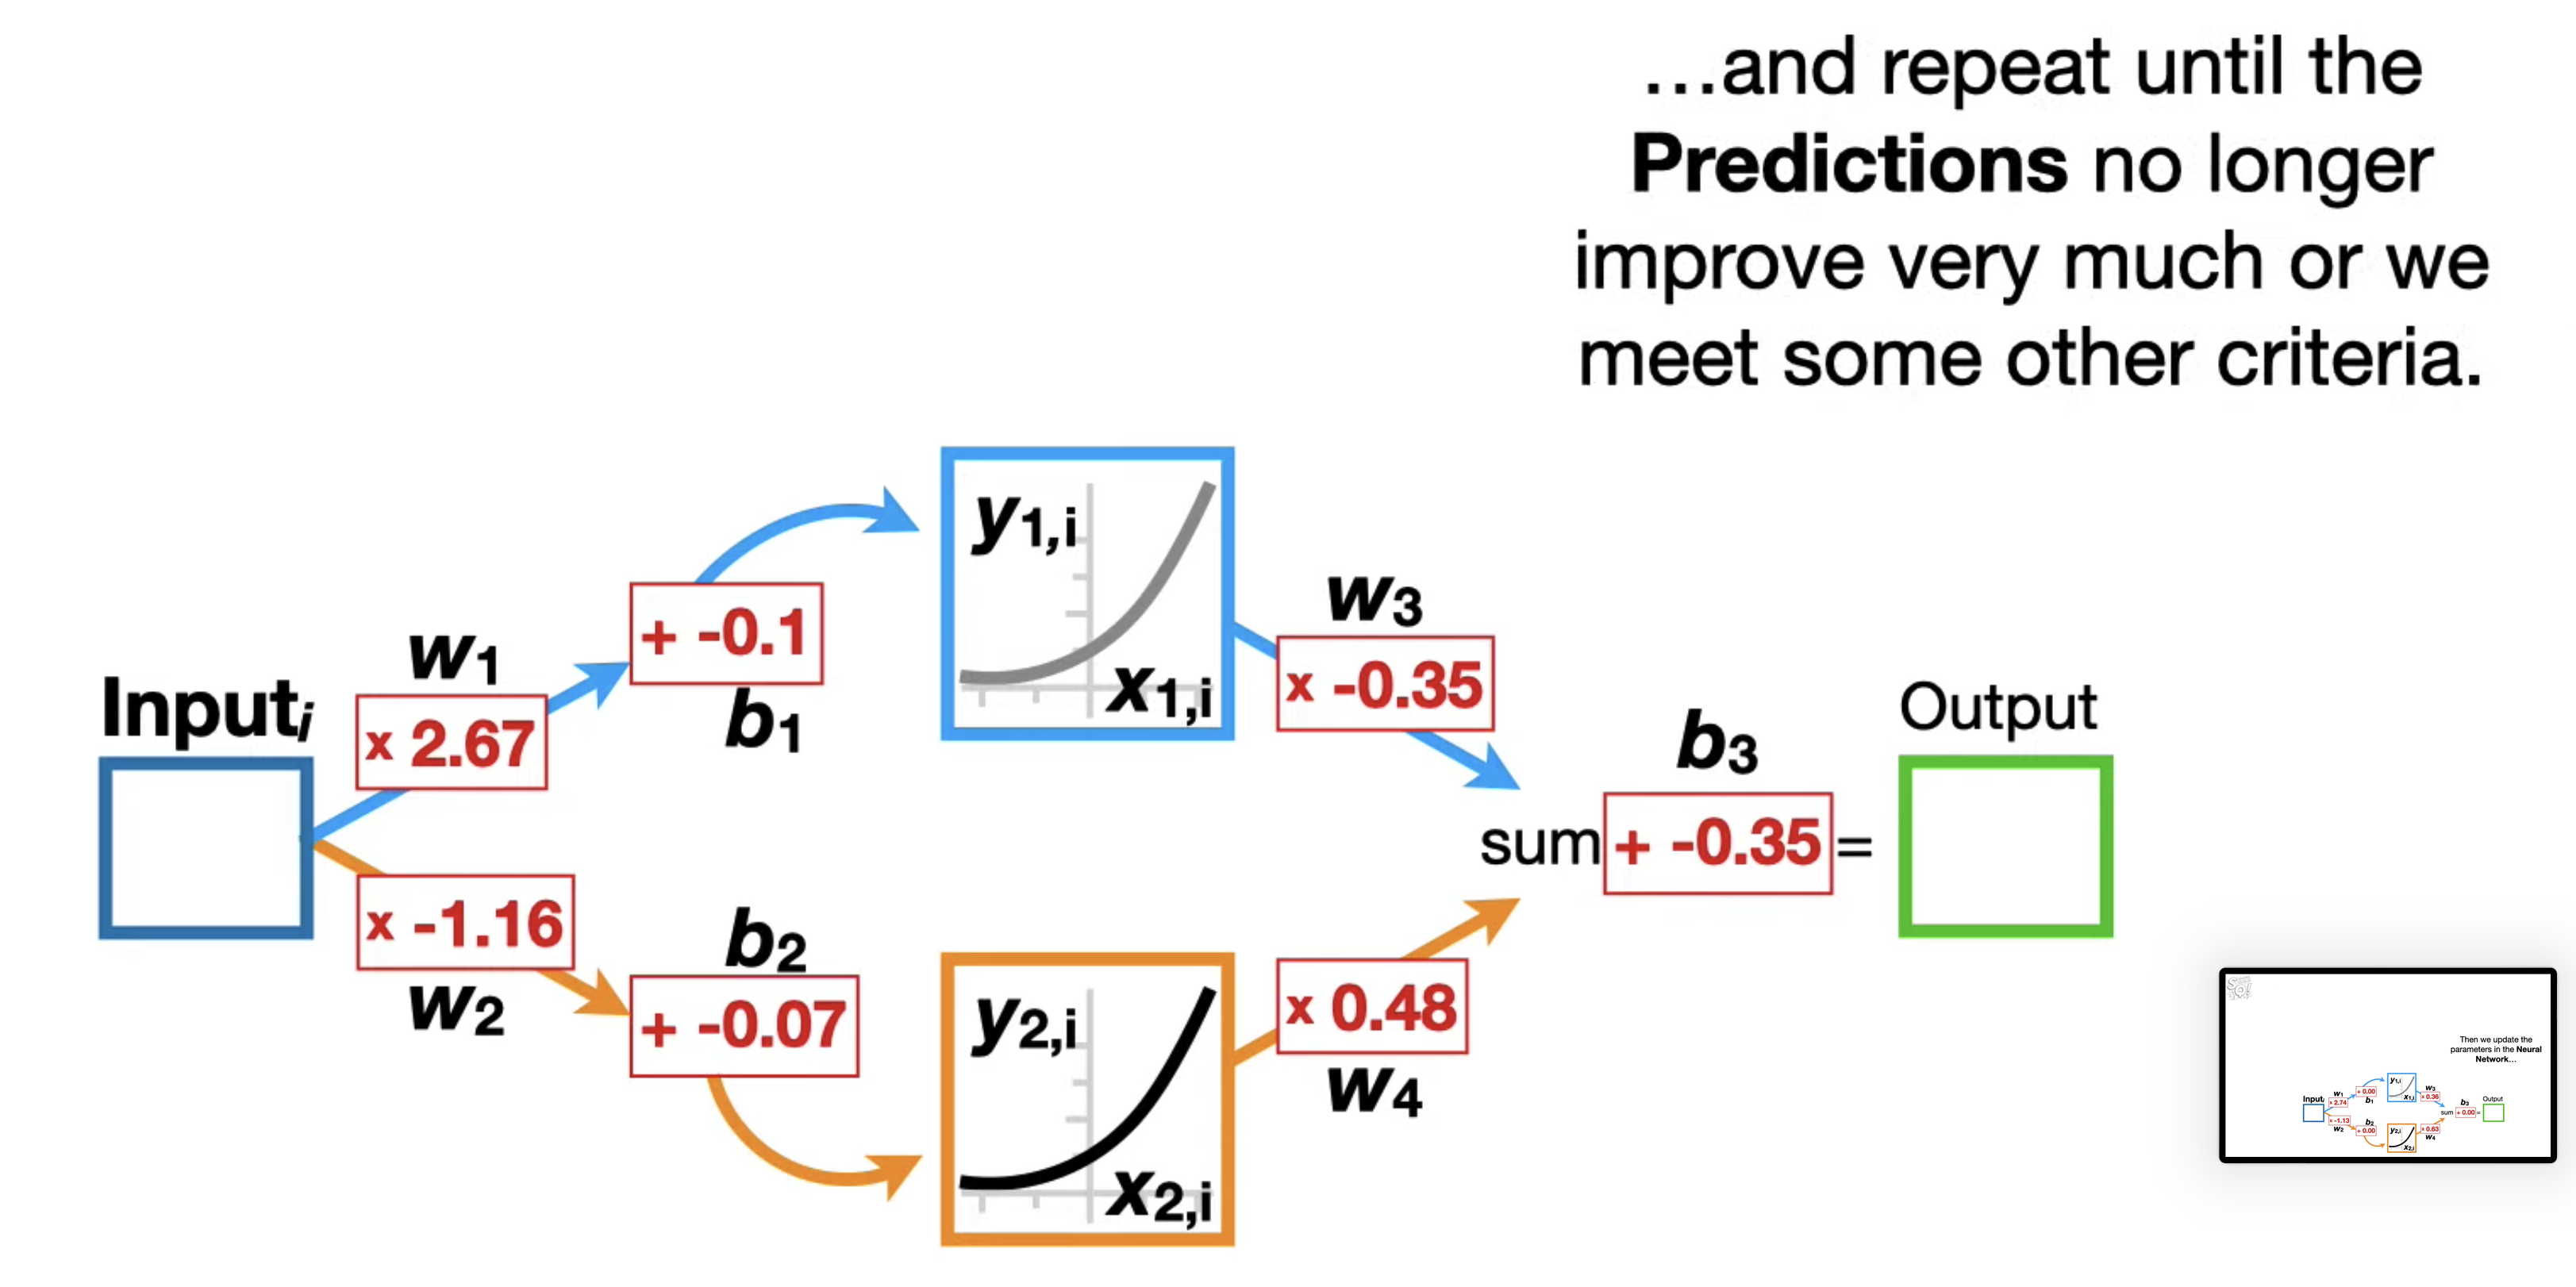

**Example No.1**

In this case, the model compute the output data by
1. Get data $\vec{x}_1$ from $X_{m}$
2. Compute first hidden layer
 * $c\cdot0=2\land n=1\implies\vec{h}_{2}=h(W_{2\times1}\cdot \vec{x}_1+\vec{b}_{2})$
2. Compute the output
 * $C=1\implies \vec{y}'_{1}=F(W_{1\times 2}\cdot\vec{h}_{2}+\vec{b}_1)$

Reference: https://youtu.be/GKZoOHXGcLo

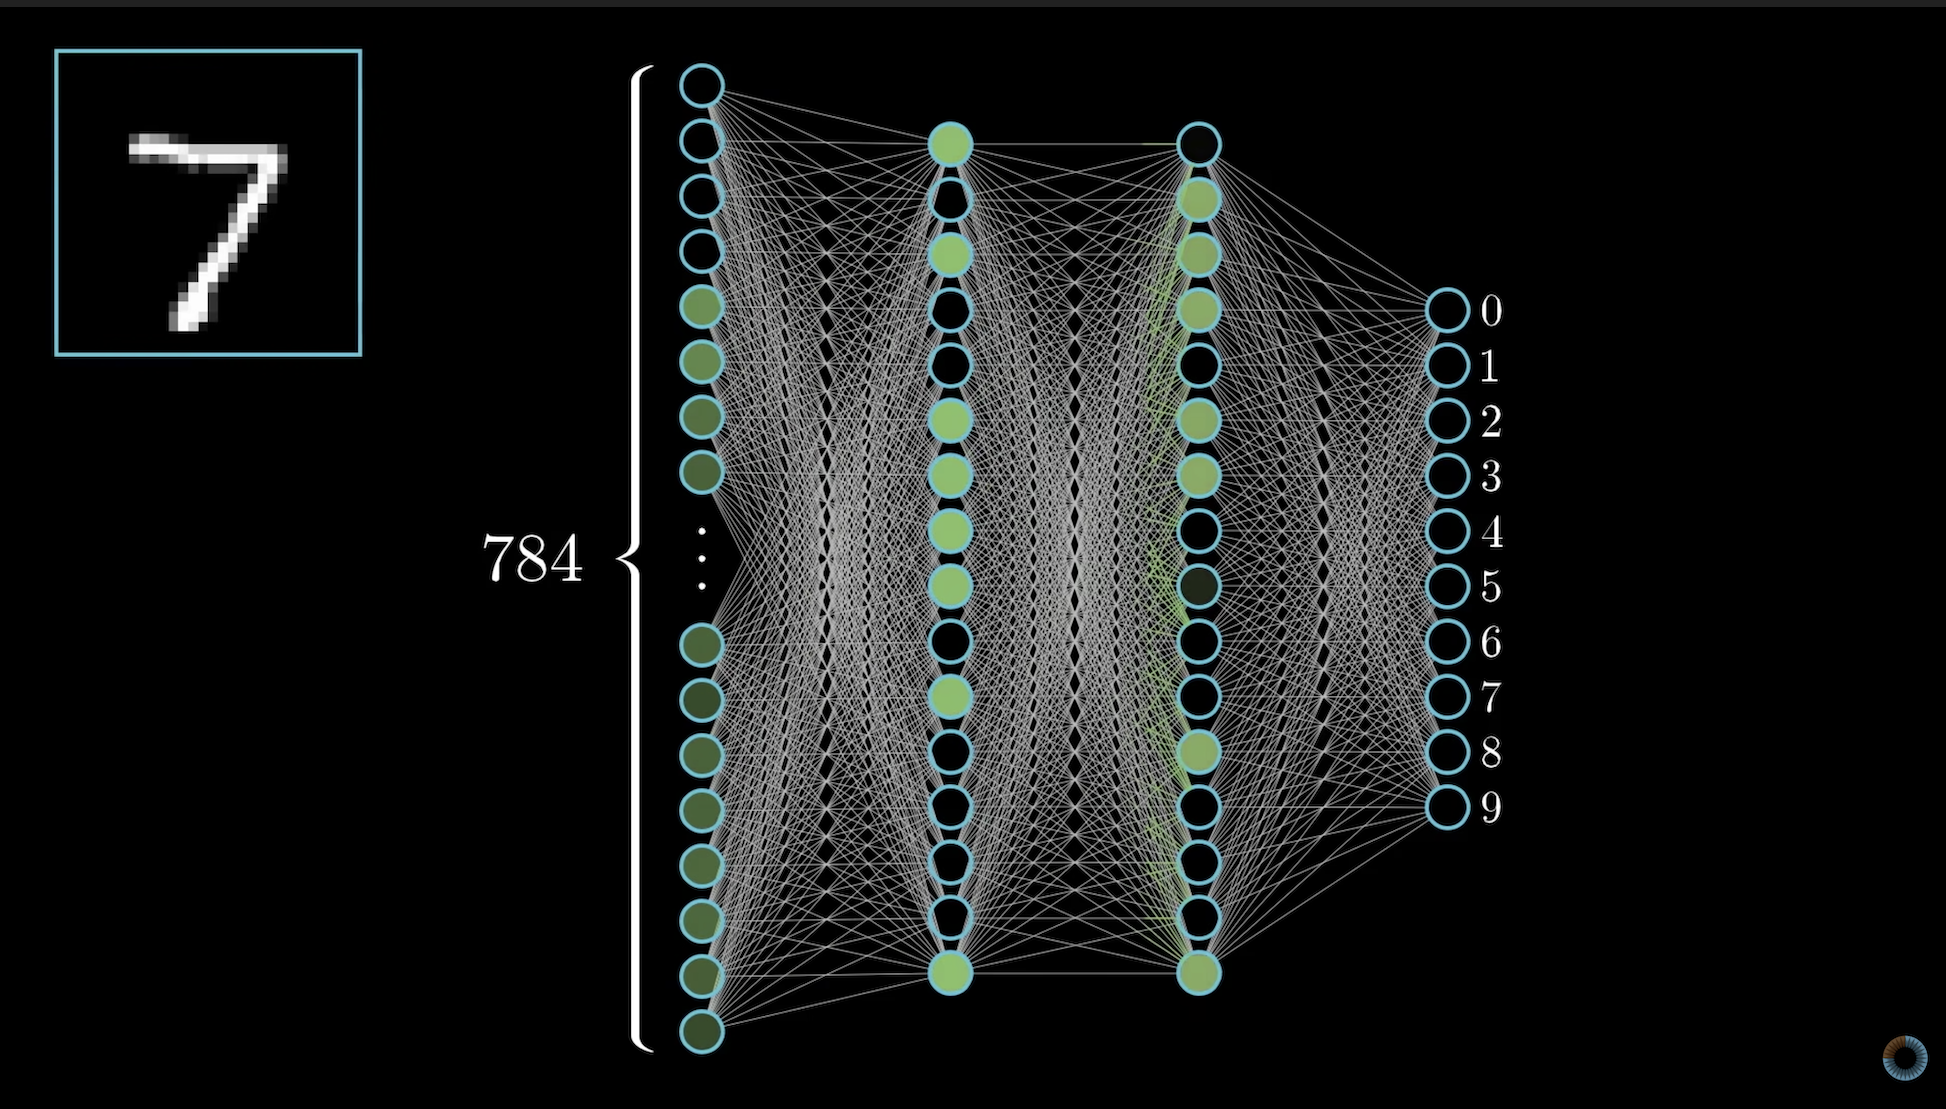

**Example No.2**

In this case, the model compute the output data by
1. Get data $\vec{x}_{784}$ from $X_{m\times 784}$
2. Compute 1st Hidden Layer
 * $c\cdot0=16\land n=784\implies\vec{h}_{16}=h(W_{16\times 784}\cdot\vec{x}_{784}+\vec{b}_{16})$
2. Compute 2nd Hidden Layer
 * $c\cdot1=16\implies \vec{h}_{16}=h(W_{16\times16}\cdot\vec{h}_{16}+\vec{b}_{16})$
3. Compute the output
 * $C=10\implies \vec{y}'_{10}=F(W_{10\times16}\cdot\vec{h}_{16}+\vec{b}_{10})$

Reference: https://youtu.be/aircAruvnKk

##Activation Function in Hidden Layers

In [ ]:
x_line=np.arange(-10,10,0.01)

###ReLu

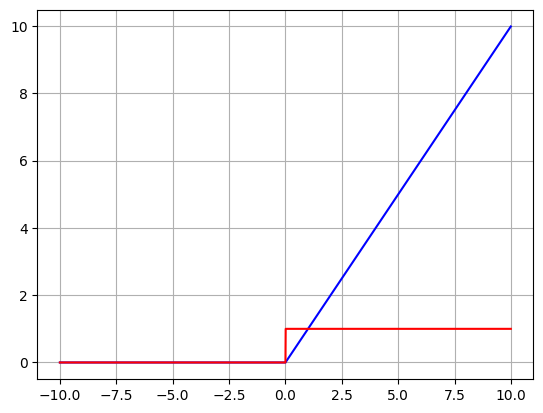

In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

# reference: https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook

plt.plot(x_line,ReLU(x_line),color='blue')  # reference: https://stackoverflow.com/questions/32109319/how-to-implement-the-relu-function-in-numpy
plt.plot(x_line,ReLU_deriv(x_line),color='red')
plt.grid()
plt.show()

**About this graph**

* Name: ReLu (Rectified linear unit)
* Formula: $f(x)=x\{x>0\}\,, 0\{x\leq 0\}$
* $\frac{\partial f}{\partial x}=1\{ x>0\}\,,0\{ x\leq0\}$
* Range: $[0,\infty]$
* Purpose: Describe non linear variable
* It is the most often used activation function in the hidden layers, because it is non-linear and it make neural network learn faster than other activation functions. However when the input is lower than or equal to $0$, its derivative is also equal $0,$ which sometimes make the model become inactive (dying ReLU problem). The approach to fix this issue is to use Leaky ReLu.

###LeakyRELU

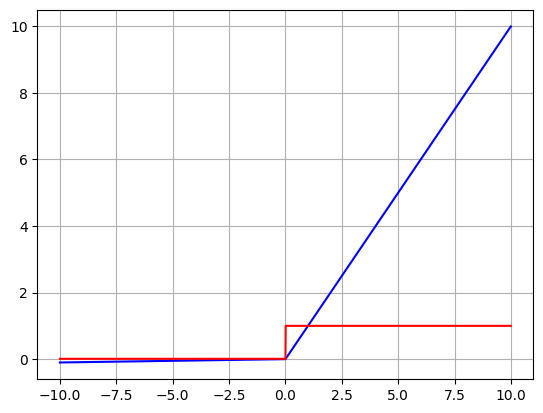

In [ ]:
LeakyReLu = lambda x,a=0.001: (abs(x)+x)/2+a*(-abs(x)+x)/2
#dYdX_LeakyReLu = lambda x,a=0.001: (abs(x)+x)/(2*x)+a*(-abs(x)+x)/(2*x)
def dYdX_LeakyReLu (x, alpha=0.001):
  dx = np.ones_like(x)
  dx[x < 0] = alpha
  return dx

plt.plot(x_line,LeakyReLu(x_line,a=0.01),color='blue')  # reference: https://stackoverflow.com/questions/32109319/how-to-implement-the-relu-function-in-numpy
plt.plot(x_line,dYdX_LeakyReLu(x_line,alpha=0.01),color='red')
plt.grid()
plt.show()

**About this graph**

* Name: Leaky ReLu
* Formula: $f(x)=x\{x>0\}\,, ax\{x\leq 0\}$
* $\frac{\partial f}{\partial x}=1\{ x>0\}\,,a\{ x\leq0\}$
* Range: $[-\infty,\infty]$
* Purpose: Describe non linear variable
* Leaky ReLu is similar to ReLu except, when the input is less than $0,$ it will multiply the input with a very small value ($a\leq 0.001$).
* When $a>0.001,$ it is called Randomized Leaky ReLu (https://paperswithcode.com/method/rrelu)

###Tanh

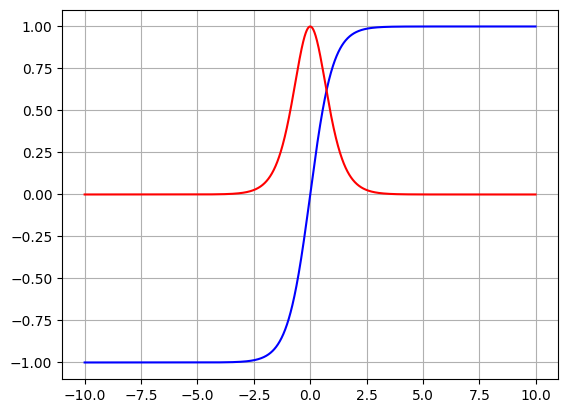

In [ ]:
Tanh = lambda x: (2)/(1+np.exp(-2*x))-1
dYdX_Tanh = lambda x: 1-Tanh(x)**2

plt.plot(x_line,Tanh(x_line),color='blue')
plt.plot(x_line,dYdX_Tanh(x_line),color='red')
plt.grid()
plt.show()

**About this graph**

* Name: Tanh
* Formula: $f(x)=\frac{2}{1+\exp(-2x)}-1$
* $\frac{\partial f}{\partial x}=1-f(x)^2$ (https://www.quora.com/What-is-the-derivative-of-tanh-x)
* Range: $[-1,1]$
* Purpose: Describe non linear variable
* Tanh function is similar to sigmoid function, except its range.
* Sigmoid and Tanh function are rarely used in hidden layer because its derivative when approach $\infty$ or $-\infty$ is equal $0,$ which make the model learn slower than the model that use ReLu. (vanishing gradient problem)
* Even through, Tanh is harder to compute than ReLU, Tanh is used in some neural network model such as recurrent neural networks for natural language processing and speech recognition tasks, because it have a range $[-1,1]$, which make it useful for some task. (https://www.upgrad.com/blog/types-of-activation-function-in-neural-networks/)

##Activation Function in Output Layer

###Identity

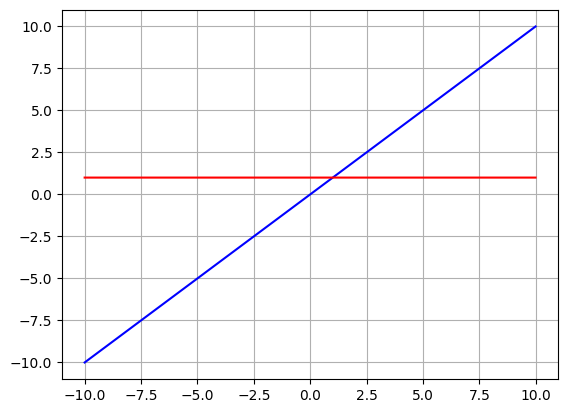

In [ ]:
Line = lambda x: x
dYdX_Line = lambda x: x/x

plt.plot(x_line,Line(x_line),color='blue')
plt.plot(x_line,dYdX_Line(x_line),color='red')
plt.grid()
plt.show()

**About this graph**
* Name: linear activation function.
* Formula: $f(x)=x$
* $\frac{\partial f}{\partial x}=1$
* Range: $[-\infty,\infty]$
* Purpose: predicts and approximate the numerical relationship between variables.
* This activation function is based on Linear Regression.
* This activation function cannot be used in Hidden Layer because it cannot describe non linear data. When replace the hidden activation function of the neural network with linear function, the total output become linear, and the neurl network

###Sigmoid

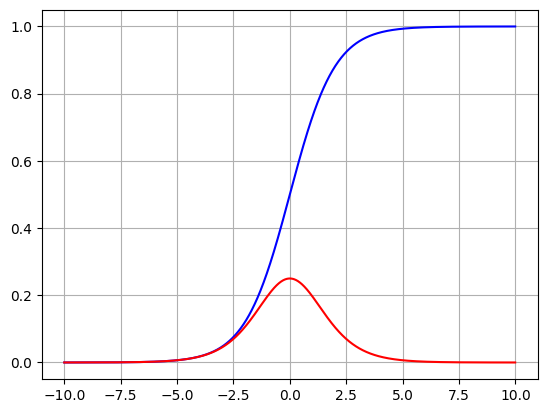

In [ ]:
Sigmoid = lambda x: (1)/(1+np.exp(-x))
dYdX_Sigmoid = lambda x: Sigmoid(x)*(1-Sigmoid(x))

plt.plot(x_line,Sigmoid(x_line),color='blue')
plt.plot(x_line,dYdX_Sigmoid(x_line),color='red')

plt.grid()
plt.show()

**About this graph**

* Name: Sigmoid Function
* Formula: $f(x)=\frac{1}{1+\exp(-x)}$
* $\frac{\partial f}{\partial x}=f(x)(1-f(x))$
* Range: $[0,1]$
* Purpose: Binary Classification.
* Sigmoid Function is the activation function of logistic regression.

###Softmax

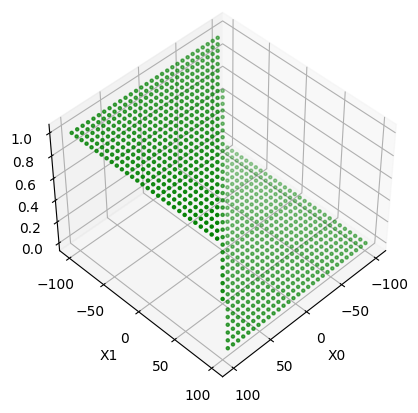

In [ ]:
def Softmax_2vars(x0,x1):
  Value_Z=[]
  for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
      Value_Z.append(np.exp(x0[i][j])/(np.exp(x0[i][j])+np.exp(x1[i][j])))
  Value_Z=np.array(Value_Z).reshape(x1.shape[0],-1)
  return Value_Z

N=30
M=30

x_values = np.linspace(-100, 100, N)
y_values = np.linspace(-100, 100, M)
X0, X1 = np.meshgrid(x_values, y_values)
Y = Softmax_2vars(X0, X1)

ax = plt.axes(projection='3d')
ax.scatter3D(X0,X1,Y,marker='.',color='green');
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
ax.view_init(45,45);
# reference: https://youtu.be/gqoLLGgbeAE

**About this graph**

* Name: Softmax
* Formula: $x_c,x_j\in\mathbb{R}\wedge x_c,x_j\in\vec{x}\implies f(\vec{x},x_c)=\frac{\exp(x_c)}{\Sigma_{i=1}^K\exp(x_i)}$
* $\frac{\partial f(\vec{x},x_c)}{\partial x_c}=x_c(1-x_c)$
* $\frac{\partial f(\vec{x},x_c)}{\partial x_j}=x_c x_j$
* This video explains how to compute derivative of Softmax: https://youtu.be/M59JElEPgIg
* Note: $\exp(x)=e^x$
* Range: $[0,1]$
* Purpose: Classification.
* Softmax can only compute a vector input that have more than one number. Therefore, it is not suitable to graph this function in 2d space.
* Sigmoid function is a particular type of Softmax function. $\text{Softmax}([x,0])=\text{Sigmoid}(x)$
* https://deepai.org/machine-learning-glossary-and-terms/softmax-layer

***

**Question: When to use Softmax vs Sigmoid function?**

Answer:

**Softmax**
* Use this function when there is only one most reliable answer. (multi-class classification problem)
* Example: When classify single hand writing digits on the image.

**Sigmoid**
* Use this function when there are multiple reliable answers. (multi-label classification problem)
* Example: When classifying diseases in a chest x-ray image.
* Also, always use this function in binary classification. (true or false)

Reference: https://stats.stackexchange.com/questions/233658/softmax-vs-sigmoid-function-in-logistic-classifier

##Weight Initialization

**Why choosing the right value of weight and bias is a good practice?**

In theory, weight and bias of the model can be any number. However choosing the right value of weight and bias can solve vanishing and exploding gradient problem.

***

**What is vanishing gradient problem?**

The derivative of some activation function such as sigmoid and tanh function approach $0$ when the absolute value of input larger, which make the model updated weight and bias too little in each learning step and make the model learn slower.

In another case, if the derivative of the initial weight of each layer in the neural network is less than $1,$ when using back propagation, the model updated weight and bias too little in each learning step and make the model learn slower.

***

**What is exploding gradient problem?**

When the gradient descent or the back propagation of the model compute the derivative of loss function too large, the model updated weight and bias too large in each learning step, which make it unstable and cannot compute the optimal value of weight and bias.

***

**How to initialize weight and bias of the neural network model?**

Given that:
* $W_{c\cdot i\times c\cdot(i-1)}=$ weight in layer no.$i$
* $\vec{b}_{c\cdot i}=$ Bias in layer no.$i$
* $f(...)=$ activation function $F(...)$ or $h(...)$
* $r=$ random number
* $a\leq r\leq b \implies r=U[a,b]$
* $N(u,s)=$ Random number from Normal Distribution with $u$ as means and $s$ as standard deviation

The standard way to initialize weight is
* $f(...)=\text{ReLu}\implies W_{c\cdot i\times c\cdot(i-1)}=r(\frac{2}{c\cdot(i-1)})^{\frac{1}{2}}$
* $f(...)=\text{ReLu}\implies W_{c\cdot i\times c\cdot(i-1)}=~N(u=0,s=(\frac{2}{c\cdot i})^{\frac{1}{2}})$
* $f(...)=\text{Tanh}\implies W_{c\cdot i\times c\cdot(i-1)}=r(\frac{1}{c\cdot(i-1)})^{\frac{1}{2}}$
* $f(...)=\text{Sigmoid}\implies W_{c\cdot i\times c\cdot(i-1)}=U[-(\frac{{6}}{c\cdot i+c\cdot(i-1)})^{\frac{1}{2}},(\frac{{6}}{c\cdot i+c\cdot(i-1)})^{\frac{1}{2}}]$
* $f(...)=\text{Line}\implies W_{c\cdot i\times c\cdot(i-1)}=r$

The standard way to initialize bias is
* $\vec{b}_{c\cdot i}=0$

***

**Reference:**
1. https://youtu.be/8krd5qKVw-Q
2. https://youtu.be/s2coXdufOzE
3. https://www.geeksforgeeks.org/weight-initialization-techniques-for-deep-neural-networks/
* This link indicate different weight initialization technique for different activation function and the tensorflow based implementation.
4. https://datascience.stackexchange.com/questions/102036/where-does-the-normal-glorot-initialization-come-from
5. https://datascience.stackexchange.com/questions/30989/what-are-the-cases-where-it-is-fine-to-initialize-all-weights-to-zero
* This link explains that if the cost function have only one local minimum. Then you can set $W$ as any number.
6. https://datascience.stackexchange.com/questions/17987/how-should-the-bias-be-initialized-and-regularized/18145#18145
* This link indicates that in most case, $B$ is set to $0$ and why it is.

##Loss Function for Regression Model

**Loss Function for Regression Neural Network**

Loss function is the function that indicate how accurate the model predict the data. The less the loss function is, the more accurate the model predict the training data.

In regression model, the loss function is

$J(Y'_{C\times m})=\frac{1}{2m}\sum^m(Y'_{C\times m}-[Y_{m\times C}]^T)^2\in\mathbb{R}$

* $J\in\mathbb{R}$
* $Y'_{C\times m}=$ Predicted Output
* $[Y_{m\times C}]^T=$ Real Output
* $m=$ number of all predicted and real output pair
* $C=$ number of all class, in classification model $C\geq1$, in regression model $C=1$


Note:
* Loss function does not indicate how useful the model is, because sometimes the model can nearly $100\%$ predicts the training data corectly, but poorly predict the training data (overfitting problem). On the other hand, if the model predicts the training data poorly, then the model have the underfitting problem.
* It is recommented to use Means Square Error and testing data for evaluate the regression neural network.

**Reference:**

1. https://builtin.com/machine-learning/loss-functions
* This link explains different type of Loss function.
2. https://stats.stackexchange.com/questions/237975/why-do-deep-learning-libraries-force-the-cost-function-to-output-a-scalar
* This link explain why $J\in\mathbb{R}$
***

##Gradient Descent, Epoch and Batch

**What is the Gradient Descent?**

Gradient Descent is the optimization algorithm that is used for minimize the value of Loss function, so that the model can compute more accurate output in respect to the data.

$W_{c\cdot i\times c\cdot(i-1)}:=W_{c\cdot i\times c\cdot(i-1)}-a\frac{\partial J}{\partial W_{c\cdot i\times c\cdot(i-1)}}$

$\vec{b}_{c\cdot i}:=\vec{b}_{c\cdot i}-a\frac{\partial J}{\partial \vec{b}_{c\cdot i}}$

* $W_{c\cdot i\times c\cdot(i-1)}=$ Weight matrix in layer no.$i$
* $\vec{b}_{c\cdot i}=$ Bias vector in layer no.$i$
* $J=$ loss function
* $a=$ learning rate

***

**What is Batch?**

Batch is a group of training sample.

The training data can be splited into multiple batch. So the AI can learning from each batch, instead of learning from all of the data set at once.

Adventage:
 * The model learn faster because the weight is updated after each propagation.
 * It requires less memory.

Disadventage:
 * The smaller the batch the less accurate the estimate of the gradient will be.

Reference:
1. (What is batch size in neural network?) https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
2. (What is meant by "Batch" in machine learning?) https://www.quora.com/What-is-meant-by-Batch-in-machine-learning

***

**What are the differences between 'epoch', 'batch', 'minibatch' and iterations?**

* $1$ Epoch = passing the entire dataset in the model $1$ times
* Batch = a group of training sample.
* Batch Size = size of a group of training sample.
* Mini Batch = a group of sub group of training sample.
* iterations = the number of batches needed to complete $1$ epoch.
1. Batch G.D. passes the entire dataset in the model in $1$ epoch $1$ times
2. Mini Batch G.D. passes the entire dataset in the model in $1$ epoch $\frac{m}{k}$ times
3. Stochastic passes the entire dataset in the model in $1$ epoch $m$ times

Reference:
1. (What are the differences between epoch, batch and minibatch?) https://stats.stackexchange.com/questions/117919/what-are-the-differences-between-epoch-batch-and-minibatch
2. What are the differences between epoch, batch size and iterations?) https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

***

**Types of Gradient Descent**
1. Batch Gradient Descent (use full batch)
1. Stochastic Gradient Descent (use 1 size batch)
1. Mini batch Gradient Descent (use small size batch)

***

**Batch Gradient Descent**

Batch Gradient Descent use full batch.
* $J=J(\Delta\overline{y})$
* $\Delta\overline{y}$ average different between the actual output data and the predicted output the whole training sample. (full batch)

***

**Stochastic Gradient Descent**

Stochastic Gradient Descent selects a single random training example. (1 size Batch)
* $J=J(\Delta y_i)$ loss function
* $\Delta y_i=$ different between the actual output data and the predicted output of a random single sample. (1 size Batch)

Adventage:
* It computes faster than Batch Gradient Descent.
* It can easily escape local minimum.
* It requires less memory.

Disadventage:
* It is less accurate than Batch Gradient Descent.
* It is sensitive to Learning Rate

Note:
* The data sample should be shuffled for every epoch. In other words, the data sample should be in a random order.

***

**Mini Batch Gradient Descent**

Mini Batch Gradient Descent divides the entire dataset into randomly picked batches and select it.
* $J=J(\Delta \overline{y}_i)$ loss function
* $\Delta \overline{y}_i=$ average different between the actual output data and the predicted output of a subset of the dataset. (1 Batch)

***

**Reference:**

1. https://www.codingninjas.com/codestudio/library/mini-batch-gradient-descent
* This link compares the different, pro and cons of 3 different types of gradient descent.
2. https://www.geeksforgeeks.org/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/
* This link compares the different, pro and cons of stochastic gradient descent and batch gradient descent.

***

##Backward Propagation for Regression Model

**How does the model compute $\frac{\partial J}{\partial W_{c\cdot i\times c\cdot(i-1)}}$ and $\frac{\partial J}{\partial \vec{b}_{c\cdot i}}$ in order to operate gradient descent?**

The process of finding $\frac{\partial J}{\partial W_{c\cdot i\times c\cdot(i-1)}}$ and $\frac{\partial J}{\partial \vec{b}_{c\cdot i}}$ in neural network is called **Backward Propagation**.

In the process of backward propagation:
1. Initializing Batch Size $=m\in\mathbb{Z^+}$
2. Compute Forward Propagation, and collect the input $\{X_{m\times n},\,X_{c\cdot0\times m},\,...,\,X_{c\cdot j\times m},\,X_{C\times m}\}$ and output $\{H_{c\cdot0\times m},\,...,\,H_{c\cdot j\times m},\,Y'_{C\times m}\}$ of every activation functions.
3. Compute $J'(W_{C\times c\cdot i})$ and $J'(\vec{b}_{C})$ in output layer
 * **Given that:**
  1. According to Chain Rule: $\frac{d}{dx}[f(g(x))]=f'(g(x))g'(x)$
  2. $J(Y'_{C\times m})\in\mathbb{R}$
  3. $Y'_{C\times m}=F(X_{C\times m})=F(W_{C\times c\cdot j}\cdot H_{c\cdot j\times m}+\vec{b}_{C}\cdot 1_{1\times m})\in\mathbb{R^{C\times m}}$
 * **In general case:**
 * $\therefore J'(X_{C\times m})=J'(Y'_{C\times m})\odot F'(X_{C\times m})\in\mathbb{R^{C\times m}}$
 * $\therefore J'(W_{C\times c\cdot j})=J'(X_{C\times m})\cdot [H_{c\cdot j\times m}]^T\in\mathbb{R^{C\times c\cdot j}}$
 * $\therefore J'(\vec{b}_C)=J'(X_{C\times m})\cdot [1_{1\times m}]^T\in\mathbb{R^{C}}$
 * $\therefore J'(H_{c\cdot j\times m})=[W_{C\times c\cdot j}]^T\cdot J'(X_{C\times m})\in\mathbb{R^{c\cdot j\times m}}$
 * **Given that:**
 * In regression case: $C=1$
 * Loss function is MSE: $J(Y'_{C\times m})=\frac{1}{2m}\sum^m(Y'_{C\times m}-[Y_{m\times C}]^T)^2\in\mathbb{R^{C\times m}}$
 * Output Activation Function is Identity: $F(x)=x$
 * $\therefore J'(Y'_{C\times m})=\frac{1}{m}(Y'_{C\times m}-[Y_{m\times C}]^T)\in\mathbb{R^{C\times m}}$
 * $\therefore F'(X_{C\times m})=1_{C\times m}\in\mathbb{R^{C\times m}}$
 * $\therefore J'(X_{C\times m})=\frac{1}{m}(Y'_{C\times m}-[Y_{m\times C}]^T)\in\mathbb{R^{C\times m}}$
4. Compute $J'(W_{c\cdot j\times c\cdot (j-1)}),\,J'(\vec{b}_{c\cdot j}),\,...,\,J'(W_{c\cdot i\times c\cdot (i-1)}),\,J'(\vec{b}_{c\cdot i}),...,\,J'(W_{c\cdot 0\times n}),\,J'(\vec{b}_{c\cdot 0})$ in hidden layers
 * **In the last hidden layer, given that:**
 1. $H_{c\cdot j\times m}=h(W_{c\cdot j\times c\cdot(j-1)}\cdot H_{c\cdot(j-1)\times m}+\vec{b}_{c\cdot j}\cdot 1_{1\times m})=h(X_{c\cdot j\times m})\in\mathbb{R^{c\cdot j\times m}}$
 2. $J'(X_{c\cdot j\times m})=J'(H_{c\cdot j\times m})\odot h'(X_{c\cdot j\times m})\in\mathbb{R^{c\cdot j\times m}}$
 * $J'(W_{c\cdot j\times c\cdot(j-1)})=J'(X_{c\cdot j\times m})\cdot [H_{c\cdot(j-1)\times m}]^T\in\mathbb{R^{c\cdot j\times c\cdot(j-1)}}$
 * $J'(\vec{b}_{c\cdot j})=J'(X_{c\cdot j\times m})\cdot [1_{1\times m}]^T\in\mathbb{R^{c\cdot j}}$
 * $J'(H_{c\cdot (j-1)\times m})=[W_{c\cdot j\times c\cdot(j-1)}]^T\cdot J'(X_{c\cdot j\times m})\in\mathbb{R^{c\cdot (j-1)\times m}}$
 * **In the second last hidden layer, given that:**
 1. $H_{c\cdot (j-1)\times m}=h(W_{c\cdot (j-1)\times c\cdot(j-2)}\cdot H_{c\cdot(j-2)\times m}+\vec{b}_{c\cdot (j-1)}\cdot 1_{1\times m})=h(X_{c\cdot (j-1)\times m})\in\mathbb{R^{c\cdot (j-1)\times m}}$
 2. $J'(X_{c\cdot (j-1)\times m})=J'(H_{c\cdot (j-1)\times m})\odot h'(X_{c\cdot (j-1)\times m})\in\mathbb{R^{c\cdot (j-1)\times m}}$
 * $J'(W_{c\cdot (j-1)\times c\cdot(j-2)})=J'(X_{c\cdot (j-1)\times m})\cdot [H_{c\cdot(j-2)\times m}]^T\in\mathbb{R^{c\cdot (j-1)\times c\cdot(j-2)}}$
 * $J'(\vec{b}_{c\cdot (j-1)})=J'(X_{c\cdot (j-1)\times m})\cdot [1_{1\times m}]^T\in\mathbb{R^{c\cdot (j-1)}}$
 * $J'(H_{c\cdot (j-2)\times m})=[W_{c\cdot (j-1)\times c\cdot(j-2)}]^T\cdot J'(X_{c\cdot (j-1)\times m})\in\mathbb{R^{c\cdot (j-2)\times m}}$
 * $...$
 * **In the $i$th hidden layer, giden that**
 1. $H_{c\cdot i\times m}=h(W_{c\cdot i\times c\cdot(i-1)}\cdot H_{c\cdot(i-1)\times m}+\vec{b}_{c\cdot i}\cdot 1_{1\times m})=h(X_{c\cdot i\times m})\in\mathbb{R^{c\cdot i\times m}}$
 2. $J'(X_{c\cdot i\times m})=J'(H_{c\cdot i\times m})\odot h'(X_{c\cdot i\times m})\in\mathbb{R^{c\cdot i\times m}}$
 * $J'(W_{c\cdot i\times c\cdot(i-1)})=J'(X_{c\cdot i\times m})\cdot [H_{c\cdot(i-1)\times m}]^T\in\mathbb{R^{c\cdot i\times c\cdot(i-1)}}$
 * $J'(\vec{b}_{c\cdot i})=J'(X_{c\cdot i\times m})\cdot [1_{1\times m}]^T\in\mathbb{R^{c\cdot i}}$
 * $J'(H_{c\cdot (i-1)\times m})=[W_{c\cdot i\times c\cdot(i-1)}]^T\cdot J'(X_{c\cdot i\times m})\in\mathbb{R^{c\cdot (i-1)\times m}}$
 * $...$
 * **In the $1$st hidden layer, giden that**
 1. $H_{c\cdot 0\times m}=h(W_{c\cdot 0\times n}\cdot [X_{m\times n}]^T+\vec{b}_{c\cdot 0}\cdot 1_{1\times m})=h(X_{c\cdot 0\times m})\in\mathbb{R^{c\cdot 0\times m}}$
 2. $J'(X_{c\cdot 0\times m})=J'(H_{c\cdot 0\times m})\odot h'(X_{c\cdot 0\times m})\in\mathbb{R^{c\cdot 0\times m}}$
 * $J'(W_{c\cdot 0\times n})=J'(X_{c\cdot 0\times m})\cdot X_{m\times n}\in\mathbb{R^{c\cdot0\times n}}$
 * $J'(\vec{b}_{c\cdot0})=J'(X_{c\cdot 0\times m})\cdot [1_{1\times m}]^T\in\mathbb{R^{c\cdot0}}$

***

**Note**
1. Activation Function Notation
 * $h(x)=$ hidden activation function, this this lecture $h(x)=\text{ReLu}(x)=x\{x>0\}\,, 0\{x\leq 0\}$
 * $F(x)=$ output activation function, this this lecture $F(x)=\text{Line}(x)=x$
2. Derivative Notation
 * $J'(M)=$ Derivative of Loss Function with respect to $M$, where $M=$ Matrix, Vector, or Scalar Value
 * $F'(X_{C\times m})=$ Derivative of output activation function with respect to matrix $X_{C\times m}$
 * $h'(M)=$ Derivative of hidden activation function with respect to $M$, where $M=$ Matrix, Vector, or Scalar Value
3. Linear Algebra Notation
 * $1_{1\times m}\in\mathbb{R^{1\times m}}=$ Matrix of ones
 * $\odot=$ Hadamard product, the operation that multiply each pair of elements from the pair of matrixes that have same shape. $A,B\in\mathbb{R^{m\times n}}\implies A\odot B=C\in\mathbb{R^{m\times n}}$
 * $[M]^T=$ Transpose of Matrix $M$
4. Derivative of Matrix and Vector
* $X\in\mathbb{R^{m\times n}}\land f(X)\in\mathbb{R}\implies\frac{\partial f}{\partial X}\in\mathbb{R^{m\times n}}$

***

**Reference:**
1. https://datascience.stackexchange.com/questions/20139/gradients-for-bias-terms-in-backpropagation
* This link explains how to calculate $J'(\vec{b}_{c\cdot i})$ in back propagation
2. https://youtu.be/FCWrduAxf-Q
* This video explains what is Vector and matrix derivatives
3. https://youtu.be/WrH-jpJIqFQ
* This video explains how to calculate a partial derivative of a function with respect to vector.

***



##Evaluating Regression Model

**How to evaluate Regression ML Model?**

There are 3 main ways
1. MAE = means absolute error = $\frac{1}{m}\sum^m(|Y'_{C\times m}-[Y_{m\times C}]^T|)$
1. MSE = means square error = $\frac{1}{m}\sum^m(Y'_{C\times m}-[Y_{m\times C}]^T)^2$
1. RMSE = square root of means square error = $(\frac{1}{m}\sum^m(Y'_{C\times m}-[Y_{m\times C}]^T)^2)^{\frac{1}{2}}$

In this case:
* $C=1$

**Note**
* $R^2$ is not suitable for evaluating most ML model except linear regression in most case because it is only explain how good the straight line fit the data. (https://stats.stackexchange.com/questions/83948/is-r-squared-value-appropriate-for-comparing-models)
* The value of this indicator is only useful when compare with multiple models.
* It is good idea to use all those 3 evaluation score for ML model comparison because those score have different pros and cons (https://youtu.be/K490SP-_H0U)
* In this regression neural network model, the Loss Function is half of MSE.

**Reference:**
1. https://stats.stackexchange.com/questions/385097/how-to-evaluate-neural-network-regression-model
2. https://stephenallwright.com/good-mse-value/

#Regression Neural Network Implementation

##Initialize Regression Neural Network

In [ ]:
def Convert2NumPy(Che):
  if str(type(Che))=="<class 'pandas.core.series.Series'>" or str(type(Che))=="<class 'list'>":
    return np.array(list(Che)).reshape(-1,1)
  elif str(type(Che))=="<class 'pandas.core.frame.DataFrame'>" or str(type(Che))=="<class 'numpy.ndarray'>":
    return Che
  elif str(type(Che))=="<class 'numpy.float64'>" or str(type(Che))=="<class 'numpy.int64'>" or str(type(Che))=="<class 'float'>" or str(type(Che))=="<class 'int'>":
    return np.array([float(Che)]).reshape(-1,1)
  else:
    return Che

def WeightInitialization(ls):
  W=[]
  B=[]
  for i in range(len(ls)):
    if i!=len(ls)-1:
      # ReLu Weight Initialization
      #w=np.random.rand(ls[i+1],ls[i])*math.sqrt(2/ls[i])

      # he initialization method (https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/)
      w=np.random.normal(0, math.sqrt(2/ls[i]), (ls[i+1],ls[i]))
      b=np.zeros((ls[i+1],1))
      W.append(w)
      B.append(b)
  return [W,B]

def ForwardPropagation(W,B,Input):
  # X and H are used for Backward Propagation.
  H=[]
  X=[]

  for i in range(len(W)):
    if i==0:
      x=W[0].dot(Input)+B[0].dot(np.ones((1,Input.shape[1])))
      h=LeakyReLu(x)
    elif i==len(W)-1:
      # Identity Output Activation Function
      x=W[-1].dot(h)+B[-1].dot(np.ones((1,Input.shape[1])))
      h=x
    else:
      x=W[i].dot(h)+B[i].dot(np.ones((1,Input.shape[1])))
      h=LeakyReLu(x)
    X.append(x)
    H.append(h)
  return [X,H]

def Prediction(W,B,Input):
  return ForwardPropagation(W,B,Convert2NumPy(Input))[1][-1][0]#[1][-1][0]

##Training Regression Neural Network

In [ ]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

def GradientDescent(a,W,B,dW,dB):#,vW,vB):
  gW=[]
  gB=[]
  #vvW=[]
  #vvB=[]

  for i in range(len(W)):
    '''
    # Momentum
    vvw=0.9*vW[i]+dW[-(i+1)]
    vvb=0.9*vB[i]+dB[-(i+1)]'''
    gw=W[i]-a*dW[-(i+1)]
    gb=B[i]-a*dB[-(i+1)]
    gW.append(gw)
    gB.append(gb)
    #vvW.append(gw)
    #vvB.append(gb)
  return [gW,gB]#,vvW,vvB]

def BackwardPropagation(W,B,x,Y):
  FP=ForwardPropagation(W,B,x.T)
  X=FP[0]
  H=FP[1]
  dW=[]
  dB=[]
  m=Y.shape[0]
  v1=np.ones((m,1))
  for i in range(len(W)):
    if i==0:
      dX_C=(H[-1]-Y.reshape(1,-1))/H[-1].shape[1]
      dw=dX_C.dot(H[-2].T)
      db=dX_C.dot(v1)
      dh=W[-1].T.dot(dX_C)
    elif i==len(W)-1:
      dX_0=np.multiply(dh,dYdX_LeakyReLu(X[0]))
      dw=dX_0.dot(x)
      db=dX_0.dot(v1)
    else:
      dX_i=np.multiply(dh,dYdX_LeakyReLu(X[-(i+1)]))
      dw=dX_i.dot(H[-(i+2)].T)
      db=dX_i.dot(v1)
      dh=W[-(i+1)].T.dot(dX_i)
    dW.append(dw)
    dB.append(db)
  return [dW,dB]

def MSE(W,B,X,Y):
  # Means Square Error for Evaluation
  predictY=Prediction(W,B,X.T)
  realY=Convert2NumPy(Y)
  return mean_squared_error(predictY,realY)

def Training(
    W,B,X,Y,tX,tY,
    epoch,  # Learning Time
    a,      # Learning Rate
    ):
  Y=Convert2NumPy(Y.T)
  History=[]
  i=0
  '''
  # Batch Gradient Descent
  BP=BackwardPropagation(W,B,X,Y)
    dW=BP[0]
    dB=BP[1]
    GD=GradientDescent(a*pow((1-0.01),i),W,B,dW,dB)
    W=GD[0]
    B=GD[1]'''

  '''
  # Initialize Momentum
  # https://www.geeksforgeeks.org/ml-momentum-based-gradient-optimizer-introduction/
  # https://youtu.be/k8fTYJPd3_I
  vW=[]
  vB=[]
  for w,b in zip(W,B):
    vW.append(np.zeros(w.shape))
    vB.append(np.zeros(b.shape))'''

  # Stochastic Gradient Descent
  for i in range(epoch):
  #while MSE(W,B,tX,tY)>=0.05:
    X, Y = shuffle(X, Y)
    for x,y in zip(X.values,Y):
      BP=BackwardPropagation(W,B,Convert2NumPy(float(x[0])),Convert2NumPy(float(y)))
      dW=BP[0]
      dB=BP[1]
      GD=GradientDescent(a*pow((1-0.01),i),W,B,dW,dB)#,vW,vB)
      #GD=GradientDescent(a,W,B,dW,dB)
      W=GD[0]
      B=GD[1]
      #vW=GD[2]
      #vB=GD[3]
    print('epoch',i)
    print('MSE_Train',MSE(W,B,X,Y))
    print('MSE_Test',MSE(W,B,tX,tY))
    #print('a',a*pow((1-0.001),i))
    print('W',W[0])
    print('B',B[0])
    row = pd.DataFrame({
              'epoch': [i],
              'MSE_Train': [MSE(W,B,X,Y)],
              'MSE_Test': [MSE(W,B,tX,tY)]
              })
    History.append(row)
    i+=1
  History = pd.concat(History)
  return [W,B,History]

##OOP

In [ ]:
class RegressionNeuralNetwork:
    def __init__(
                 self,
                 Layer, # list
                 ):
        # Define Neural Network
        Create_RegressNN=WeightInitialization(Layer)
        self.W = Create_RegressNN[0]
        self.B = Create_RegressNN[1]
        self.TrainingTime=0
        self.History=0

    def _Prediction(self,Input):
        return Prediction(self.W,self.B,Input.T)
    def _Training(self,X,Y,tX,tY,epoch=1000,a=0.5):
        Start = time.time()
        Fitting=Training(self.W,self.B,X,Y,tX,tY,epoch,a)
        self.W = Fitting[0]
        self.B = Fitting[1]
        self.History = Fitting[2]
        self.TrainingTime=time.time() - Start# reference: https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution
        print('Training Time',self.TrainingTime)
    def _Evaluation(self,X,Y):
        return MSE(self.W,self.B,X,Y)

#Evaluating Regression Model No.1 $y=2x^2-3x-4$

In [ ]:
TrX=TrX01
TrY=TrY01
TeX=TeX01
TeY=TeY01

In [ ]:
Model01=RegressionNeuralNetwork([1,12,12,1])
Model01._Training(TrX,TrY,TeX,TeY)
print('Means Square Error =',Model01._Evaluation(TeX,TeY))
for i in range(3):
  print('Task No.1')
  print('Input\n',TeX.iloc[10*i,:])
  print('Prediction =',Model01._Prediction(Convert2NumPy(TeX.iloc[10*i,:])))
  print('Real Result =',TeY.iloc[10*i])

'''
Advice on how to train the model: https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn
'''

Streaming output truncated to the last 5000 lines.
B [[-2.03193660e-03]
 [-1.17430670e-02]
 [-1.60741494e-03]
 [-7.47989878e-03]
 [-6.65714199e-01]
 [-2.07901054e-04]
 [-9.93056327e-03]
 [-3.97348296e-01]
 [-1.25304706e+00]
 [-6.55395870e-04]
 [-4.28058384e-03]
 [-5.50162639e-01]]
epoch 816
MSE_Train 8.951910173756883e-05
MSE_Test 9.778700149007631e-05
W [[ 2.03086215]
 [-0.15285579]
 [ 1.6070439 ]
 [-1.69975157]
 [ 0.88182835]
 [ 0.20743669]
 [-0.51558732]
 [ 1.2742417 ]
 [ 1.49546784]
 [-0.1689631 ]
 [-1.3405504 ]
 [ 1.76723732]]
B [[-2.03243297e-03]
 [-1.17430673e-02]
 [-1.60764705e-03]
 [-7.47989827e-03]
 [-6.65714486e-01]
 [-2.08086061e-04]
 [-9.93056372e-03]
 [-3.97348409e-01]
 [-1.25304751e+00]
 [-6.55395618e-04]
 [-4.28058362e-03]
 [-5.50163085e-01]]
epoch 817
MSE_Train 8.95191232520477e-05
MSE_Test 9.778483248944661e-05
W [[ 2.0308622 ]
 [-0.15285579]
 [ 1.6070439 ]
 [-1.69975157]
 [ 0.88182867]
 [ 0.20743674]
 [-0.51558732]
 [ 1.27424163]
 [ 1.49546811]
 [-0.1689631 ]
 [-1.34

'\nAdvice on how to train the model: https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn\n'

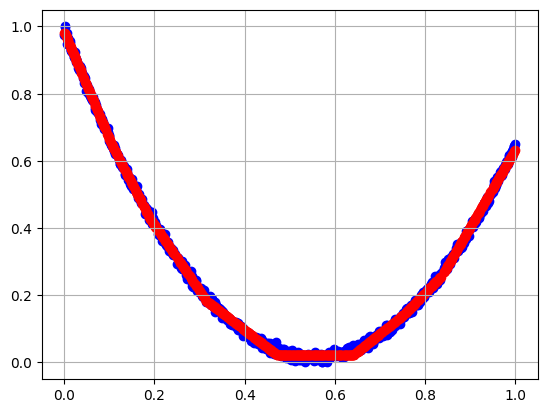

In [ ]:
examX=TrX
examY=TrY
plt.scatter(examX['X'],examY,color='blue')
plt.scatter(examX['X'],Model01._Prediction(examX),color='red')
plt.grid()

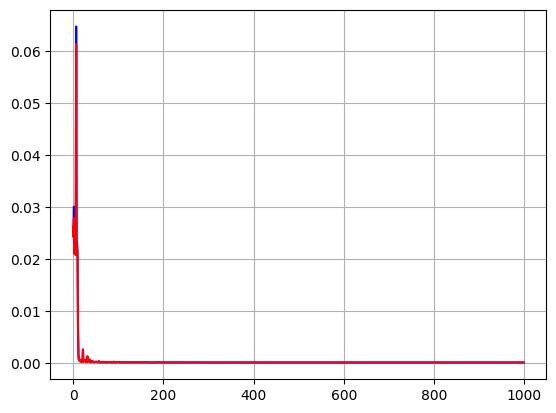

In [ ]:
plt.plot(Model01.History['epoch'],Model01.History['MSE_Train'],color='blue')
plt.plot(Model01.History['epoch'],Model01.History['MSE_Test'],color='red')

plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print('Means Square Error')
print('* training data',mean_squared_error(TrY, Model01._Prediction(Convert2NumPy(TrX))))
print('* testing data',mean_squared_error(TeY, Model01._Prediction(Convert2NumPy(TeX))))

Means Square Error
* training data 8.951687352240556e-05
* testing data 9.778799281288364e-05


#Evaluating Regression Model No.2 $y=e^x-x^3$

In [ ]:
TrX=TrX02
TrY=TrY02
TeX=TeX02
TeY=TeY02

In [ ]:
Model02=RegressionNeuralNetwork([1,12,12,1])
Model02._Training(TrX,TrY,TeX,TeY)
print('Means Square Error =',Model02._Evaluation(TeX,TeY))
for i in range(3):
  print('Task No.1')
  print('Input\n',TeX.iloc[10*i,:])
  print('Prediction =',Model02._Prediction(Convert2NumPy(TeX.iloc[10*i,:])))
  print('Real Result =',TeY.iloc[10*i])

'''
Advice on how to train the model: https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn
'''

Streaming output truncated to the last 5000 lines.
B [[-1.49964541e+00]
 [-1.36853275e+00]
 [-1.00011470e-04]
 [-1.54357335e-03]
 [-7.64982380e-05]
 [-3.92595020e+00]
 [-3.76741869e+00]
 [ 2.04556304e-01]
 [-7.92473312e-03]
 [-1.40895418e-04]
 [-1.16631179e-02]
 [-2.85423326e+00]]
epoch 816
MSE_Train 2.2958982192164954e-05
MSE_Test 2.634709012809793e-05
W [[ 1.81914669]
 [ 1.55944731]
 [-2.09306055]
 [-0.07861371]
 [-1.15422394]
 [ 3.91494385]
 [ 4.06000248]
 [-0.54380871]
 [-0.23406329]
 [-0.29200438]
 [-0.924275  ]
 [ 2.83225771]]
B [[-1.49964610e+00]
 [-1.36853346e+00]
 [-1.00011380e-04]
 [-1.54357291e-03]
 [-7.64980682e-05]
 [-3.92595020e+00]
 [-3.76741958e+00]
 [ 2.04556254e-01]
 [-7.92473215e-03]
 [-1.40895138e-04]
 [-1.16631170e-02]
 [-2.85423326e+00]]
epoch 817
MSE_Train 2.2958972879152513e-05
MSE_Test 2.635653269367451e-05
W [[ 1.81914581]
 [ 1.55944676]
 [-2.09306055]
 [-0.07861371]
 [-1.15422394]
 [ 3.91494385]
 [ 4.06000098]
 [-0.54380873]
 [-0.23406328]
 [-0.29200438]
 [-0

'\nAdvice on how to train the model: https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn\n'

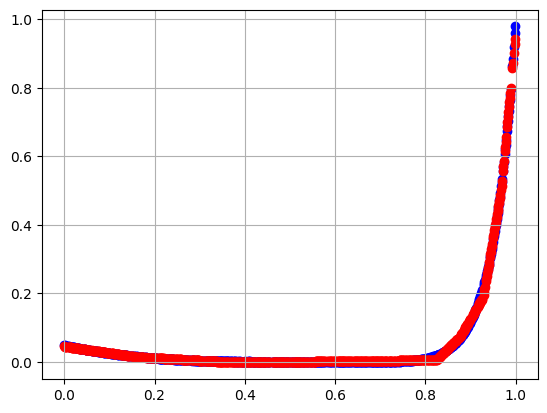

In [ ]:
examX=TrX
examY=TrY
plt.scatter(examX['X'],examY,color='blue')
plt.scatter(examX['X'],Model02._Prediction(examX),color='red')
plt.grid()

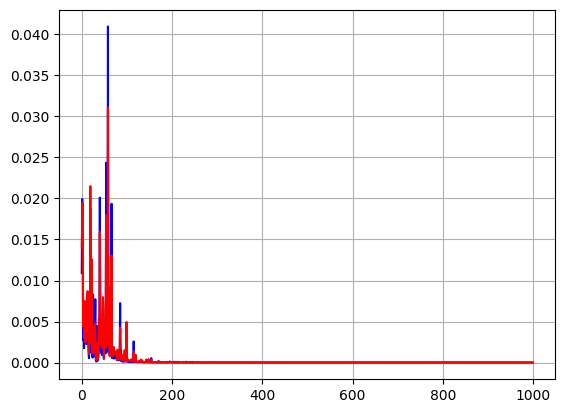

In [ ]:
plt.plot(Model02.History['epoch'],Model02.History['MSE_Train'],color='blue')
plt.plot(Model02.History['epoch'],Model02.History['MSE_Test'],color='red')

plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print('Means Square Error')
print('* training data',mean_squared_error(TrY, Model02._Prediction(Convert2NumPy(TrX))))
print('* testing data',mean_squared_error(TeY, Model02._Prediction(Convert2NumPy(TeX))))

Means Square Error
* training data 2.295334859941643e-05
* testing data 2.633112684068021e-05


#Evaluating Regression Model No.3 $y=4\sin(x)$

In [ ]:
TrX=TrX03
TrY=TrY03
TeX=TeX03
TeY=TeY03

In [ ]:
Model03=RegressionNeuralNetwork([1,12,12,1])
Model03._Training(TrX,TrY,TeX,TeY)
print('Means Square Error =',Model03._Evaluation(TeX,TeY))
for i in range(3):
  print('Task No.1')
  print('Input\n',TeX.iloc[10*i,:])
  print('Prediction =',Model03._Prediction(Convert2NumPy(TeX.iloc[10*i,:])))
  print('Real Result =',TeY.iloc[10*i])

'''
Advice on how to train the model: https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn
'''

Streaming output truncated to the last 5000 lines.
B [[ 1.62383813e-01]
 [-2.38781090e+00]
 [-2.09674161e-03]
 [ 5.14772024e-04]
 [-5.55834761e-01]
 [-1.00296583e+00]
 [-4.15942646e-05]
 [ 3.89213551e-03]
 [-2.78545934e-03]
 [-2.71717457e+00]
 [-1.86410221e-03]
 [-1.61676318e-01]]
epoch 816
MSE_Train 0.002554996880793744
MSE_Test 0.0025907272849442615
W [[-2.34054487]
 [ 3.5151172 ]
 [-0.02476311]
 [-1.4650782 ]
 [ 3.73356273]
 [ 1.00076928]
 [-1.78996458]
 [-2.91599374]
 [-1.13249437]
 [ 4.53449075]
 [-2.22264098]
 [ 0.18440098]]
B [[ 1.62384284e-01]
 [-2.38781236e+00]
 [-2.09674130e-03]
 [ 5.14772185e-04]
 [-5.55833026e-01]
 [-1.00296583e+00]
 [-4.15947132e-05]
 [ 3.89213486e-03]
 [-2.78545895e-03]
 [-2.71717592e+00]
 [-1.86410274e-03]
 [-1.61676318e-01]]
epoch 817
MSE_Train 0.0025549974829496753
MSE_Test 0.002590667366891351
W [[-2.340546  ]
 [ 3.515117  ]
 [-0.02476311]
 [-1.46507821]
 [ 3.73356474]
 [ 1.00076928]
 [-1.78996458]
 [-2.91599374]
 [-1.13249437]
 [ 4.53448917]
 [-2.222

'\nAdvice on how to train the model: https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn\n'

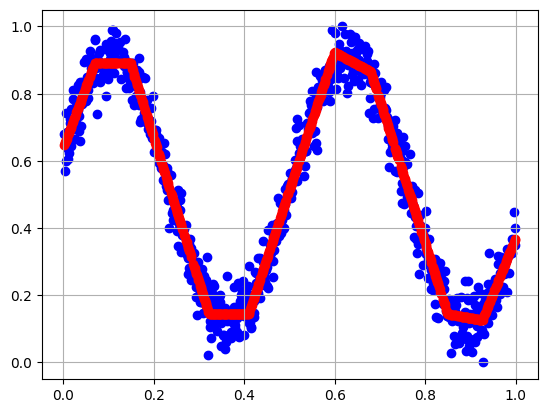

In [ ]:
examX=TrX
examY=TrY
plt.scatter(examX['X'],examY,color='blue')
plt.scatter(examX['X'],Model03._Prediction(examX),color='red')
plt.grid()

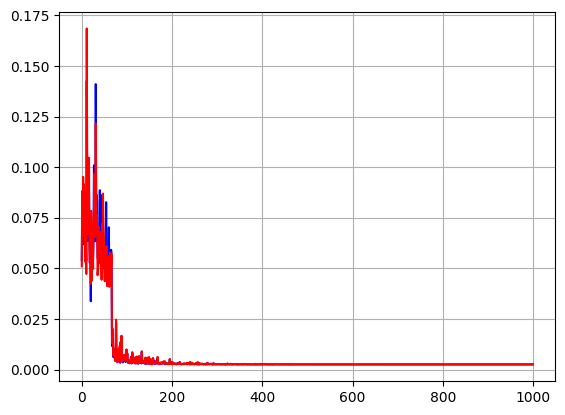

In [ ]:
plt.plot(Model03.History['epoch'],Model03.History['MSE_Train'],color='blue')
plt.plot(Model03.History['epoch'],Model03.History['MSE_Test'],color='red')

plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print('Means Square Error')
print('* training data',mean_squared_error(TrY, Model03._Prediction(Convert2NumPy(TrX))))
print('* testing data',mean_squared_error(TeY, Model03._Prediction(Convert2NumPy(TeX))))

Means Square Error
* training data 0.002554980623705006
* testing data 0.002590694283304146


#Regression Neural Network in Tensorflow No.1 $y=2x^2-3x-4$

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [ ]:
TrX=TrX01
TrY=TrY01
TeX=TeX01
TeY=TeY01

In [ ]:
Tensow_Model01 = tf.keras.Sequential()
Tensow_Model01.add(tf.keras.layers.Dense(12, input_shape=(TrX.shape[1],)))
Tensow_Model01.add(tf.keras.layers.Dense(12,activation='relu'))
Tensow_Model01.add(tf.keras.layers.Dense(1,activation='linear'))
Tensow_Model01.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [ ]:
history = Tensow_Model01.fit(
    TrX,
    TrY,
    epochs=1000,
    batch_size=100
    )

Epoch 1/1000
8/8 [==============================] - 2s 4ms/step - loss: 0.3248
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.1955
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.1544
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.1182
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.1002
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0947
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0916
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0903
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0889
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 11/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0896
Epoch 12/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0882
Epoch 13/1000
8/8 [==============================

24/24 [==============================] - 0s 1ms/step


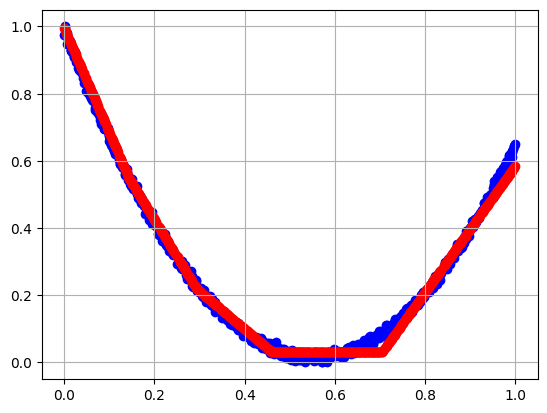

In [ ]:
examX=TrX
examY=TrY
plt.scatter(examX['X'],examY,color='blue')
plt.scatter(examX['X'],Tensow_Model01.predict(examX),color='red')
plt.grid()

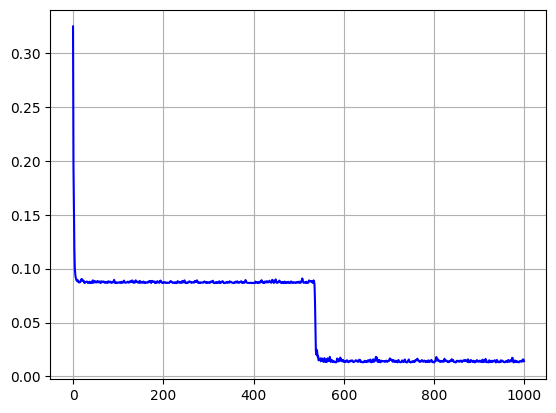

In [ ]:
hist = pd.DataFrame(history.history)
plt.plot(hist.index,hist['loss'],color='Blue')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print('Means Square Error')
print('* training data',mean_squared_error(TrY, Tensow_Model01.predict(TrX)))
print('* testing data',mean_squared_error(TeY, Tensow_Model01.predict(TeX)))

Means Square Error
24/24 [==============================] - 0s 1ms/step
* training data 0.00038191690350602785
8/8 [==============================] - 0s 1ms/step
* testing data 0.00039692862423859864


#Regression Neural Network in Tensorflow No.2 $y=e^x-x^3$

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [ ]:
TrX=TrX02
TrY=TrY02
TeX=TeX02
TeY=TeY02

In [ ]:
Tensow_Model02 = tf.keras.Sequential()
Tensow_Model02.add(tf.keras.layers.Dense(12, input_shape=(TrX.shape[1],)))
Tensow_Model02.add(tf.keras.layers.Dense(12,activation='relu'))
Tensow_Model02.add(tf.keras.layers.Dense(1,activation='linear'))
Tensow_Model02.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [ ]:
history = Tensow_Model02.fit(
    TrX,
    TrY,
    epochs=1000,
    batch_size=100
    )

Epoch 1/1000
8/8 [==============================] - 1s 2ms/step - loss: 0.0736
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 11/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 12/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0390
Epoch 13/1000
8/8 [==============================

24/24 [==============================] - 0s 1ms/step


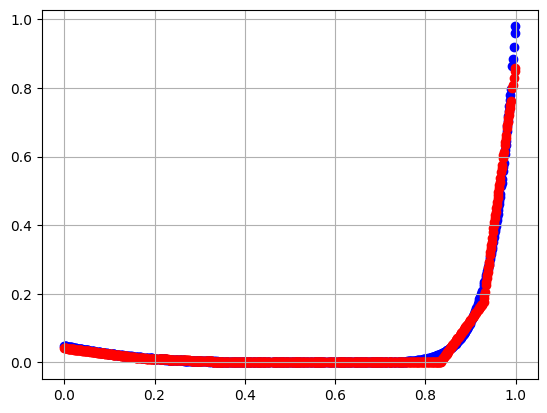

In [ ]:
examX=TrX
examY=TrY
plt.scatter(examX['X'],examY,color='blue')
plt.scatter(examX['X'],Tensow_Model02.predict(examX),color='red')
plt.grid()

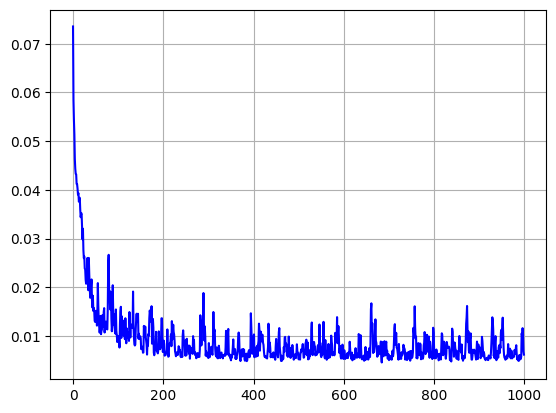

In [ ]:
hist = pd.DataFrame(history.history)
#hist.head()
plt.plot(hist.index,hist['loss'],color='Blue')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print('Means Square Error')
print('* training data',mean_squared_error(TrY, Tensow_Model02.predict(TrX)))
print('* testing data',mean_squared_error(TeY, Tensow_Model02.predict(TeX)))

Means Square Error
24/24 [==============================] - 0s 1ms/step
* training data 0.0001615693470956599
8/8 [==============================] - 0s 1ms/step
* testing data 0.00022269953669387327


#Regression Neural Network in Tensorflow No.3 $y=4\sin(x)$

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [ ]:
TrX=TrX03
TrY=TrY03
TeX=TeX03
TeY=TeY03

In [ ]:
Tensow_Model03 = tf.keras.Sequential()
Tensow_Model03.add(tf.keras.layers.Dense(12, input_shape=(TrX.shape[1],)))
Tensow_Model03.add(tf.keras.layers.Dense(12,activation='relu'))
Tensow_Model03.add(tf.keras.layers.Dense(1,activation='linear'))
Tensow_Model03.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [ ]:
history = Tensow_Model03.fit(
    TrX,
    TrY,
    epochs=1000,
    batch_size=100
    )

Epoch 1/1000
8/8 [==============================] - 1s 2ms/step - loss: 0.4745
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 3/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 4/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2450
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2188
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2082
Epoch 7/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2091
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2095
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2087
Epoch 10/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2067
Epoch 11/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2094
Epoch 12/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2078
Epoch 13/1000
8/8 [==============================

24/24 [==============================] - 0s 2ms/step


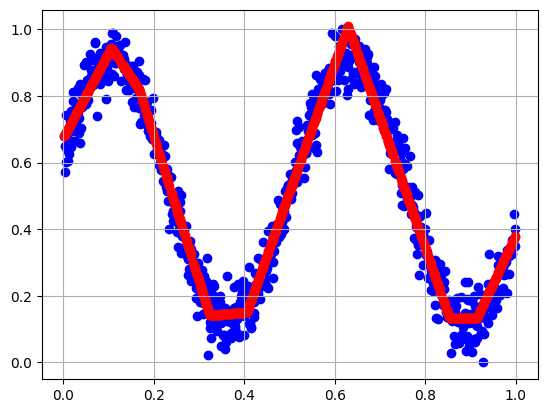

In [ ]:
examX=TrX
examY=TrY
plt.scatter(examX['X'],examY,color='blue')
plt.scatter(examX['X'],Tensow_Model03.predict(examX),color='red')
plt.grid()

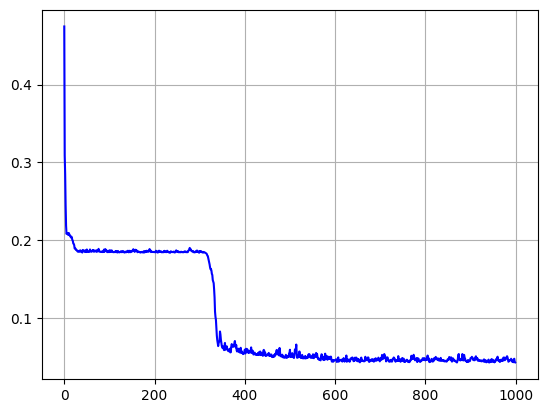

In [ ]:
hist = pd.DataFrame(history.history)
#hist.head()
plt.plot(hist.index,hist['loss'],color='Blue')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print('Means Square Error')
print('* training data',mean_squared_error(TrY, Tensow_Model03.predict(TrX)))
print('* testing data',mean_squared_error(TeY, Tensow_Model03.predict(TeX)))

Means Square Error
24/24 [==============================] - 0s 2ms/step
* training data 0.002972466807898094
8/8 [==============================] - 0s 3ms/step
* testing data 0.0031909329450861726
